# Questions 

## Question 1 

- a) When .dropna is used on the entire column, 39 data points are lost in each column. 

- b) To solve this I plan on using the skipna function to simply pass the missing values. This will keep as much data as possible and also prevent array sizes from varying. 

## Question 2 

- a) Tables complete below.

- b) Plot below.

- c) Plot below.

- d) Plot below.

- e) Visually, the city type and season seem to have an effect on PM_AVG, but it is largely unaffected by year. This makes sense as over the years seasons will be consistent, and the environment that a specific type of city is in would likely have a major impact on its particulate matter. 

## Question 3

- I am doing part a), the ANOVA related to city air quality. 

- The ANOVA revealed a p-value of 1.9133e-27, which is much lower than 0.05, revealing a statistically significant difference in air quality between cities. The f-value was 53.1164. 

## Question 4

- I am doing the calculation for part b), the Linear Regression describing a relationship between PRES and PM_AVG.

- There is some relationship between PRES and PM_AVG. It is appropriate to compare them, however they are not *strongly* correlated. 

In [ ]:
# import stuff
import os 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [102]:
# CSV reading function

def csv_reader(file_name):
    
    directory = os.path.dirname('__file__')
    file_directory = os.path.join(directory, file_name)
       
    file_path = file_directory
    
    try:
        csv_read = pd.read_csv(file_path)
    
    except Exception as e:
        print('Failed to load data')
        print(f'Error: {e}')
        csv_read = None
        
    return csv_read

In [ ]:
# Data sorting function
def data_sorter(data):
    
    grouped = data.groupby(['City', 'Year'])
    
    grouped_data = {key: group.to_dict('records') for key, group in grouped}
        
    return grouped_data

In [ ]:
# Empty Value Dropper

def read_data_dropped(data):
    
    dropped_data = data.dropna()
    
    return dropped_data

In [105]:
# Analyzes the data
def data_analyzer(data):
    
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    
    analysis_results = {}
    
    for key, rows in data.items():
        
        city, year = key
        key = (city, year)

        
        df = pd.DataFrame(rows)
        
        stats = {
            'Average Particulate Matter': df['PM_AVG'].mean(skipna=True),
            'Median Particulate Matter': df['PM_AVG'].median(skipna=True),
            'Std Particulate Matter': df['PM_AVG'].std(skipna=True),
            
            'Average Dewpoint': df['DEWP'].mean(skipna=True),
            'Median Dewpoint': df['DEWP'].median(skipna=True),
            'Std Dewpoint': df['DEWP'].std(skipna=True),
            
            'Average Humidity': df['HUMI'].mean(skipna=True),
            'Median Humidity': df['HUMI'].median(skipna=True),
            'Std Humidity': df['HUMI'].std(skipna=True),
            
            'Average Pressure': df['PRES'].mean(skipna=True),
            'Median Pressure': df['PRES'].median(skipna=True),
            'Std Pressure': df['PRES'].std(skipna=True),
            
            'Average Temperature': df['TEMP'].mean(skipna=True),
            'Median Temperature': df['TEMP'].median(skipna=True),
            'Std Temperature': df['TEMP'].std(skipna=True),
            
            'Sample Size': len(df)
        }
        
        stats = {k: float(v) if isinstance(v, np.float64) else v for k, v in stats.items()}
        
        analysis_results[key] = stats
        
    return analysis_results

In [106]:
# Create summary tables and plots
def create_summary_tables(data):

    city_summary = data.groupby('City')['PM_AVG'].agg(['mean', 'std']).round(2)
    
    year_summary = data.groupby('Year')['PM_AVG'].agg(['mean', 'std']).round(2)
    
    season_summary = data.groupby('Season')['PM_AVG'].agg(['mean', 'std']).round(2)
    
    print("PM_AVG Summary by City:")
    print(city_summary)
    
    print("\nPM_AVG Summary by Year:")
    print(year_summary)
    
    print("\nPM_AVG Summary by Season:")
    print(season_summary)
    
    return city_summary, year_summary, season_summary


In [ ]:
def plot_mean_std(data, category, title):
    plt.figure(figsize=(10, 6))
    
    means = data.groupby(category)['PM_AVG'].mean()
    stds = data.groupby(category)['PM_AVG'].std()
    
    plt.bar(means.index, means, yerr=stds, capsize=5)
    plt.title(f'PM_AVG by {category}: Mean ± Standard Deviation')
    plt.ylabel('PM_AVG')
    plt.xlabel(category)
    plt.xticks(rotation=45 if category in ['City', 'Year'] else 0)
    plt.tight_layout()
    plt.show()

In [108]:
def perform_city_anova(data):

    city_groups = []
    
    for city in data['City'].unique():

        city_data = data[data['City'] == city]['PM_AVG'].dropna()
        if len(city_data) > 0:  
            city_groups.append(city_data)
    
    f_statistic, p_value = stats.f_oneway(*city_groups)
    
    print("\nOne-way ANOVA Results for City Air Quality:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.4e}")
    
    alpha = 0.05
    
    print("\nInterpretation:")
    
    if p_value < alpha:
        print(f"The p-value ({p_value:.4e}) is less than {alpha}")
        print("There is a statistically significant difference in air quality between cities")
    else:
        print(f"The p-value ({p_value:.4e}) is greater than {alpha}")
        print("There is no statistically significant difference in air quality between cities")
    
    return f_statistic, p_value

In [109]:
def linear_regression_pres_pmavg(data):
    
    df = data[['PRES', 'PM_AVG']].dropna()
    
    
    slope, intercept, r_value, p_value, std_err = linregress(df['PRES'], df['PM_AVG'])
    
    print("\nLinear Regression Results: PM_AVG vs PRES")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-squared (coefficient of determination): {r_value**2:.4f}")
    print(f"P-value: {p_value:.4e}")
    
    
    print("\nInterpretation:")
    if r_value**2 > 0.5:
        print("There is a strong linear relationship between pressure and PM_AVG.")
    elif r_value**2 > 0.2:
        print("There is a moderate linear relationship between pressure and PM_AVG.")
    else:
        print("There is a weak or no linear relationship between pressure and PM_AVG.")
        print("A linear model may not be appropriate for describing this relationship.")
    
    plt.figure(figsize=(8,6))
    plt.scatter(df['PRES'], df['PM_AVG'], alpha=0.5, label='Data')
    plt.plot(df['PRES'], intercept + slope * df['PRES'], color='red', label='Fit')
    plt.xlabel('PRES')
    plt.ylabel('PM_AVG')
    plt.title('Linear Regression: PM_AVG vs PRES')
    plt.legend()
    plt.tight_layout()
    plt.show()

PM_AVG Summary by City:
           mean    std
City                  
Bighill   54.38  16.36
Capital   93.58  21.42
Coastown  55.60  17.48
Highcity  83.94  33.89

PM_AVG Summary by Year:
       mean    std
Year              
2011  90.23  29.74
2012  71.66  23.78
2013  78.17  32.01
2014  68.63  27.08
2015  61.08  26.37

PM_AVG Summary by Season:
         mean    std
Season              
Fall    69.44  22.84
Spring  69.19  17.63
Summer  53.38  21.94
Winter  96.89  32.20


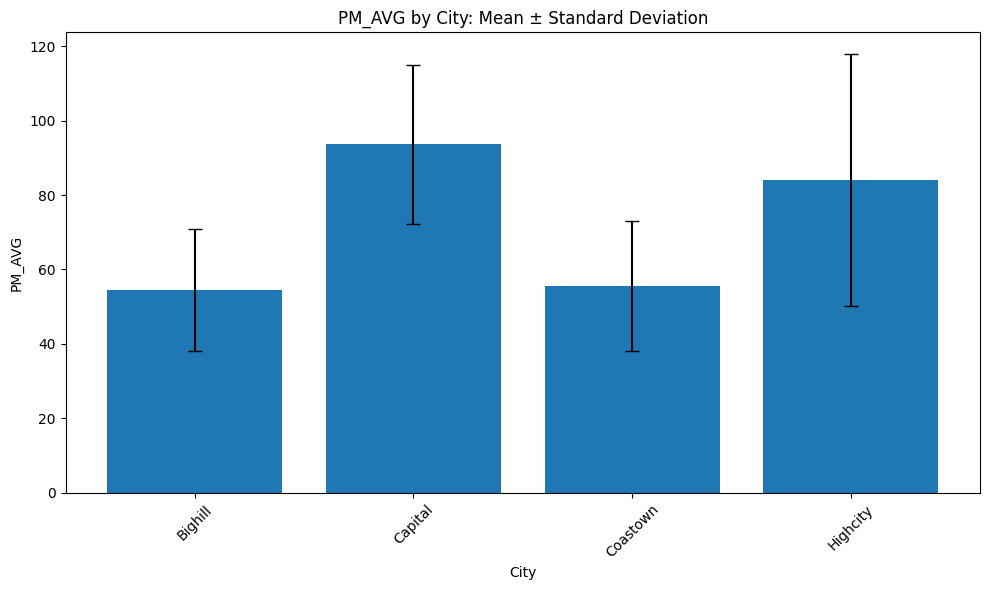

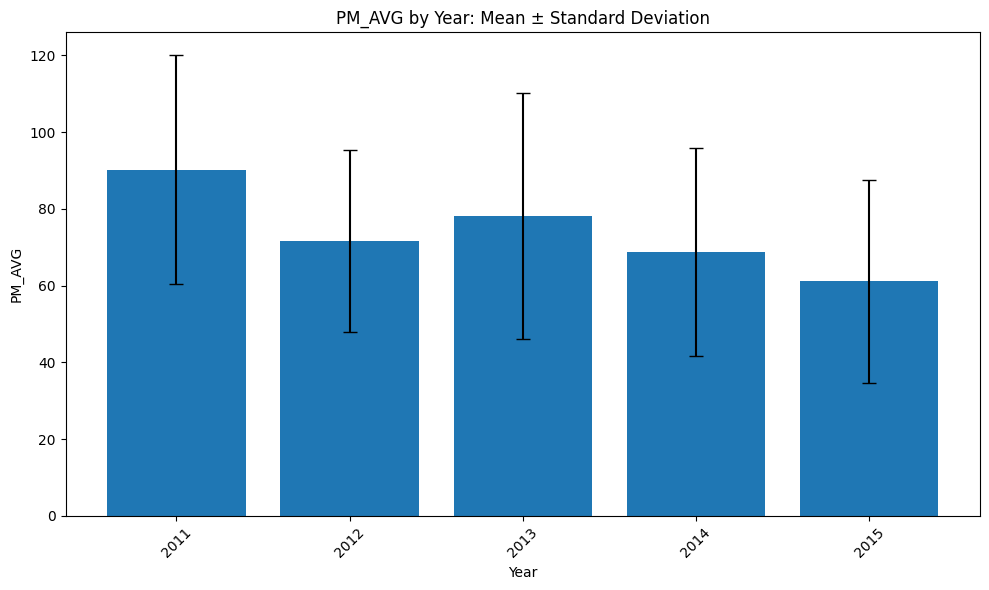

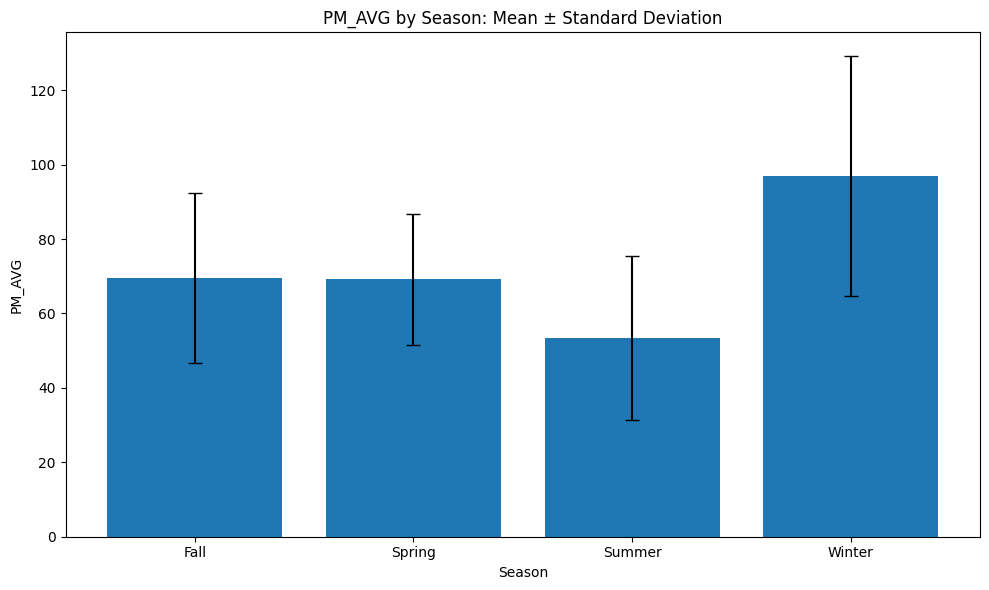


One-way ANOVA Results for City Air Quality:
F-statistic: 53.1164
p-value: 1.9133e-27

Interpretation:
The p-value (1.9133e-27) is less than 0.05
There is a statistically significant difference in air quality between cities

Linear Regression Results: PM_AVG vs PRES
Slope: 2.1232
Intercept: -2078.6489
R-squared (coefficient of determination): 0.3863
P-value: 3.9669e-33

Interpretation:
There is a moderate linear relationship between pressure and PM_AVG.


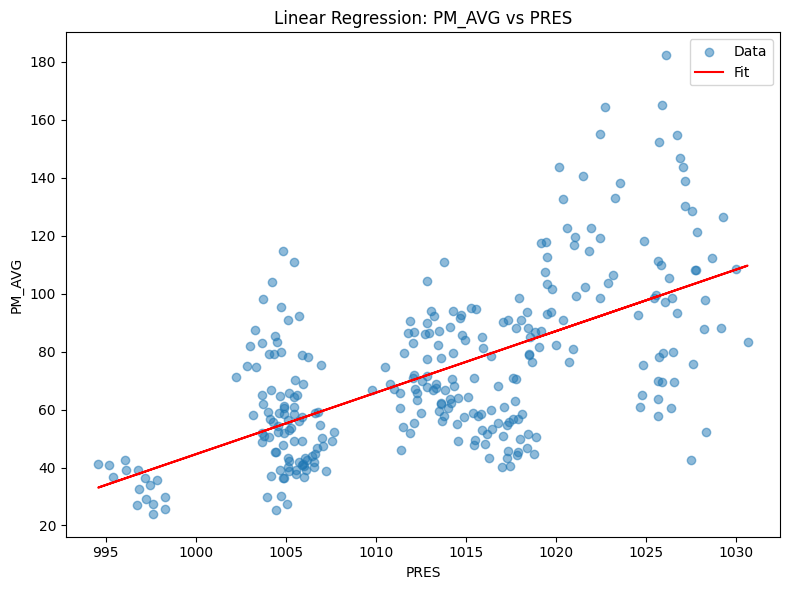

'\n\ndf = pd.DataFrame(read_data)\n\nprint(df.count())\n\ndf = pd.DataFrame(read_data_dropped(read_data))\n\nprint(df.count())\n'

In [110]:
# Testing 

file_name = 'AirQualityData.csv'

read_data = csv_reader(file_name)

sorted_data = data_sorter(read_data)

analyzed_data = data_analyzer(sorted_data)

city_summary, year_summary, season_summary = create_summary_tables(read_data)

plot_mean_std(read_data, 'City', 'PM_AVG by City')
plot_mean_std(read_data, 'Year', 'PM_AVG by Year')
plot_mean_std(read_data, 'Season', 'PM_AVG by Season')

f_stat, p_val = perform_city_anova(read_data)

linear_regression_pres_pmavg(read_data)

'''

df = pd.DataFrame(read_data)

print(df.count())

df = pd.DataFrame(read_data_dropped(read_data))

print(df.count())
'''
